# Neuronales Netzwerk: Data Preparation
## Neuronales Modell mit unseren Daten (Häuserpreise angepasst)

In [71]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

# Import Data
df_training = pd.read_csv("/workspaces/MA-bakery-sales-prediction/_data_prepared/df_training_neural_network.csv")
df_validation = pd.read_csv("/workspaces/MA-bakery-sales-prediction/_data_prepared/df_validation_neural_network.csv")
df_test = pd.read_csv("/workspaces/MA-bakery-sales-prediction/_data_prepared/df_test_neural_network.csv")
df_training.head()  # Print first few rows to verify
df_validation.head()  # Print first few rows to verify

,Umsatz,Brot,Broetchen,Croissant,Konditorei,Kuchen,Saisonbrot,national_holiday,christmas_market,KielerWoche,...,Monat_3,Monat_4,Monat_5,Monat_6,Monat_7,Monat_8,Monat_9,Monat_10,Monat_11,Monat_12
0,166.135486,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,557.470898,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,294.872701,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
3,88.208006,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,325.864228,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


## Definition training features and labels

In [83]:
import numpy as np




# Separating features and labels
training_features = df_training.drop('Umsatz', axis=1)
validation_features = df_validation.drop('Umsatz', axis=1)
test_features = df_test.drop('Umsatz', axis=1)



training_labels = df_training[['Umsatz']]
validation_labels = df_validation[['Umsatz']]
test_labels = df_test[['Umsatz']]

# Print dimensions of the dataframes
print("Training features dimensions:", training_features.shape)
print("Validation features dimensions:", validation_features.shape)
print("Test features dimensions:", test_features.shape)
print()
print("Training labels dimensions:", training_labels.shape)
print("Validation labels dimensions:", validation_labels.shape)
print("Test labels dimensions:", test_labels.shape)

Training features dimensions: (7487, 33)
Validation features dimensions: (1777, 33)
Test features dimensions: (1830, 34)

Training labels dimensions: (7487, 1)
Validation labels dimensions: (1777, 1)
Test labels dimensions: (1830, 1)


## Data Export

In [73]:
# Create subdirectory for the pickle files
subdirectory = "pickle_data"
os.makedirs(subdirectory, exist_ok=True)

# Export of the prepared data to subdirectory as pickle files
training_features.to_pickle(f"{subdirectory}/training_features.pkl")
validation_features.to_pickle(f"{subdirectory}/validation_features.pkl")
test_features.to_pickle(f"{subdirectory}/test_features.pkl")
training_labels.to_pickle(f"{subdirectory}/training_labels.pkl")
validation_labels.to_pickle(f"{subdirectory}/validation_labels.pkl")
test_labels.to_pickle(f"{subdirectory}/test_labels.pkl")

# Neuronales Netzwerk: Data Preparation
## Importing the Data 
We will start by importing the data and taking a look at the first few rows.

In [74]:
# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (7487, 33)
Loaded Validation features dimensions: (1777, 33)
Loaded Test features dimensions: (1830, 34)

Loaded Training labels dimensions: (7487, 1)
Loaded Validation labels dimensions: (1777, 1)
Loaded Test labels dimensions: (1830, 1)

First few rows of loaded training features:
   Brot  Broetchen  Croissant  Konditorei  Kuchen  Saisonbrot  \
0   1.0        0.0        0.0         0.0     0.0         0.0   
1   0.0        1.0        0.0         0.0     0.0         0.0   
2   0.0        0.0        1.0         0.0     0.0         0.0   
3   0.0        0.0        0.0         1.0     0.0         0.0   
4   0.0        0.0        0.0         0.0     1.0         0.0   

   national_holiday  christmas_market  KielerWoche  temp_bins_sehr_kalt  ...  \
0               0.0               0.0          0.0                  0.0  ...   
1               0.0               0.0          0.0                  0.0  ...   
2               0.0               0.0          0

## Installation of dependencies

In [75]:
# Once only 
!rm -rf myenv
!python -m venv myenv
# Run the following command in your terminal:
# source myenv/bin/activate  # On Windows use `myenv\Scripts\activate`
!pip install -y numpy==1.26.0
!pip install -y tensorflow==2.17.1


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -y


## Defining the Neural Network
Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [76]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Our data for training_features
training_features = pd.DataFrame(np.random.rand(7487, 33))

# Define the model
model = Sequential([
    InputLayer(shape=(training_features.shape[1], )),
    BatchNormalization(),
    Dense(10, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

# Print the model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_6           │ (None, 33)             │           132 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           340 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 521 (2.04 KB)

 Trainable params: 455 (1.78 KB)

 Non-trainable params: 66 (264.00 B)

## Compiling and Training the Model 
We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data.

In [77]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 64156.3828 - val_loss: 46454.0898
Epoch 2/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40964.2148 - val_loss: 21051.4668
Epoch 3/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26562.0254 - val_loss: 19886.8730
Epoch 4/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23516.3672 - val_loss: 19018.7012
Epoch 5/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22944.4492 - val_loss: 18625.1621
Epoch 6/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22876.4746 - val_loss: 18340.9180
Epoch 7/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22078.4434 - val_loss: 18174.8516
Epoch 8/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22716.7227 - val_loss: 18029.2578
Epoch 9/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23079.2207 - val_loss: 17907.3027
Epoch 10/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23029.5195 - val_loss: 17887.7539
Epoch 11/20
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

## Saving the Trained Model
After training, it's a good practice to save the model for future use.

In [78]:
model.save("neuronales_modell_v2.h5")

## Plotting Training History
Visualizing the training and validation loss can help us understand the model's performance over time.

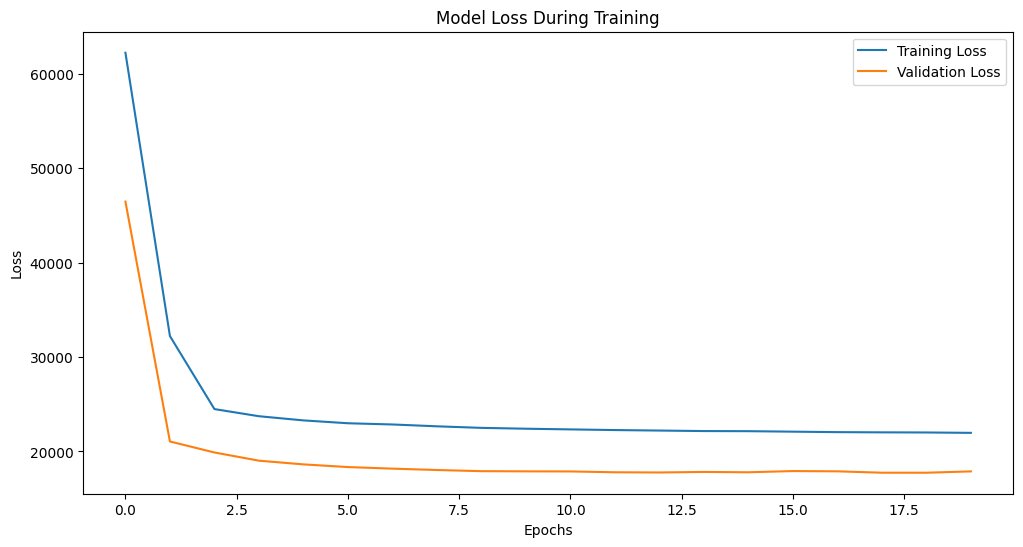

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Making Predictions and Evaluating the Model
Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [80]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load the model with custom_objects
model = load_model("neuronales_modell_v2.h5", custom_objects={"mse": MeanSquaredError()})

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step
MAPE on the Training Data: 86.07%
MAPE on the Validation Data: 85.24%


## Visualizing Predictions vs Actual Values
Visualizing the predicted versus actual values can provide insights into the model's accuracy.

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


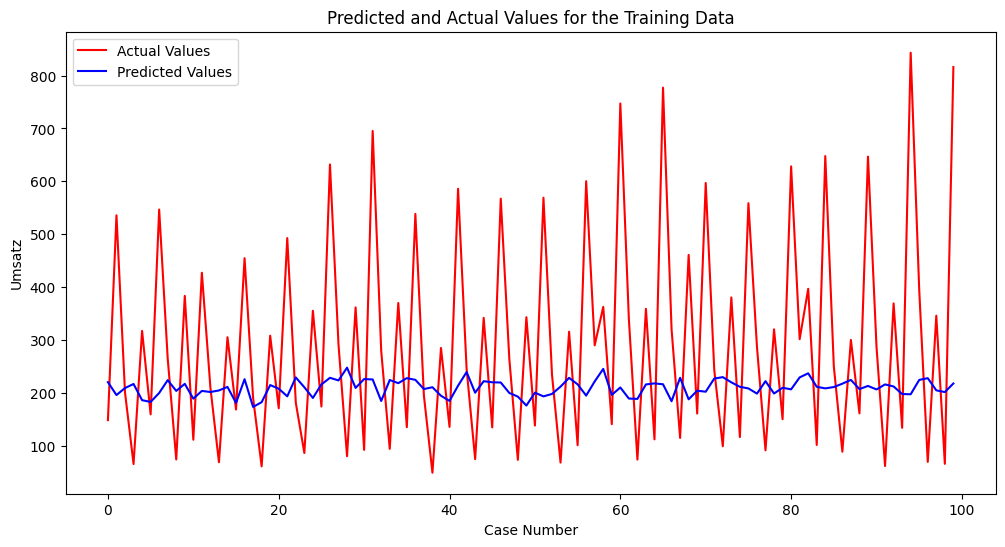

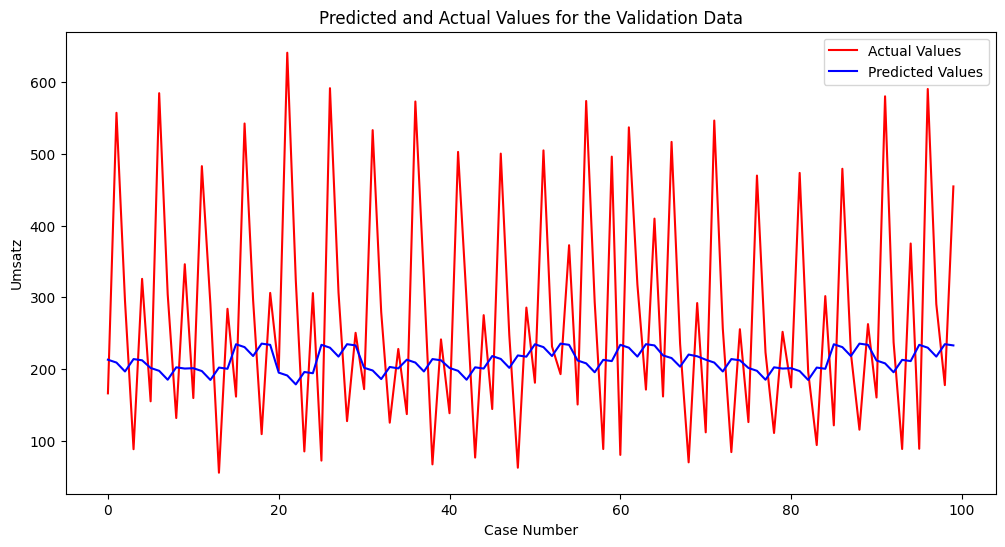

In [81]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Umsatz')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')

## Creating the prediction of Umsatz based on the Neural Network

In [82]:
import pandas as pd

# Load the dataset
df_test_neural_network = pd.read_csv('../_data_prepared/df_test_neural_network.csv')

# Drop columns that are not part of the training features
df_pred_neural_network = df_test_neural_network.drop(['Umsatz'], axis=1)

# Ensure the test data has the same number of features as the training data
# assert df_pred_neural_network.shape[1] == training_features.shape[1], "Mismatch in number of features"

# Calculate the Umsatz using the neural network model using model.predict
# model is the neural network model
df_pred_neural_network['Umsatz'] = model.predict(df_pred_neural_network.drop(['id'], axis=1))

# Save the predictions in a CSV file
df_pred_neural_network.to_csv('../_data_prepared/df_predictions_neuralNetwork.csv', index=False)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
